In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [33]:
# initializing constants
K = 0.06
s = 20.
a = 23300.
io = 2e-7
L = 1.
n = 1
F = 96485
R = 8.314
T = 298
I = 0.1


#graph analytically
X = np.linspace(0., L, 100)
Y=y = X/L
v = L*np.sqrt(a*io*(n*F)/(R*T)*(K + s)/(K*s))
i2 = I * K/(K + s)*(1 + (s*(K**-1)*np.sinh(v*(1-y)) - np.sinh(v*y))/np.sinh(v))

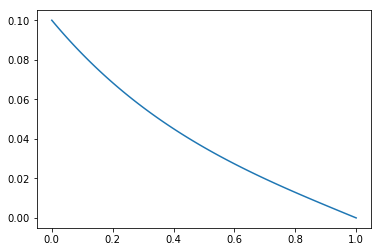

In [34]:
plt.plot(X, i2)

In [40]:
#solve numerically
def simplebattfunc(i, x):
    i0, i1 = i
    di = i1
    d2i = a*io*(n*F)/(R*T)*(-I/s + i0*(1/s + 1/K))
    return di, d2i

def battfunc(IV, x):
    i1, i2, V1, V2 = IV
    di2 = a*io*(n*F)/(R*T)*(V1 - V2)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    return di1, di2, dV1, dV2

-2.64387745261
-2.64387745261
-2.64387745261
-2.64387740887
-0.000125154261894
4.08210965031e-12
-5.6829541073e-15


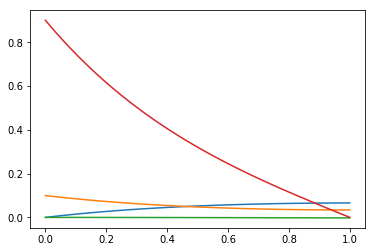

In [41]:
def objective2(V2o):
    V = odeint(battfunc, [0, I, 0, V2o], t)
    print(V[-1, 3])
    return V[-1,3]

V2o = fsolve(objective2, 0)
t = np.linspace(0., 1., 100)
batt = odeint(battfunc, [0, I, 0, V2o], t)
plt.plot(t, batt)

0.29354480019
0.29354480019
0.29354480019
0.293544823854
1.19613405422e-09
-1.87657615142e-13
-0.184841932429


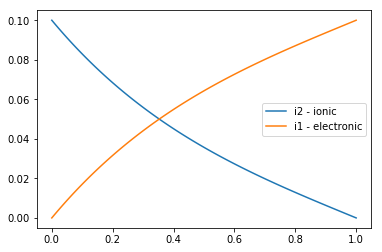

In [37]:
from scipy.optimize import fsolve

u1_0 = I
def objective(u2_0):
    """
    The thing we want to set equal to zero
    """
    U = odeint(simplebattfunc, [u1_0, u2_0], t)
    print(U[-1,0])
    return U[-1,0]

u2_0, = fsolve(objective, 0)
print(u2_0)

i = odeint(simplebattfunc, [u1_0, u2_0], t)
i1 = I - i[:,0]
plt.plot(t, i[:,0], label = 'i2 - ionic')
plt.plot(t, i1, label = 'i1 - electronic')
plt.legend(loc = 'best')

In [24]:
fsolve?